In [1]:
import helpers
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Data Story

## Abstract
In dieser Datastory geht es um die Analyse der Eigenschaften von Sternen, die Hoststerne von Exoplaneten sind. Untersucht wird, welche Eigenschaften Einfluss auf den Spektraltypen eines Sterns haben oder diesen sogar definieren. Ausserdem sind generelle Abhängigkeiten der Eigenschaften der Sterne von Interesse.

Bei meiner Analyse habe ich beobachtet, dass vor allem die Temperatur eines Sterns und dessen Lichtstärke, so wie auch die Masse ausschlaggebende Eigenschaften bei der Klassifizierung der Sterne in Spektraltypen von Bedeutung sind. Einen gewissen Einfluss hat auch das Alter der Sterne. Sterne in einem blauen Lichtspektrum sind sehr jung im Vergleich zu den anderen Spektraltypen.
Auch habe ich herausgefunden dass der Radius einen starken Zusammenhang mit der Lichtstärke und der Oberflächenanziehungskraft des Sternes zeigt.

## Introduction
Im letzten Jahrzent wurden viele Exoplaneten entdeckt. Das heutige Archiv zählt über 4100 Entdeckungen. Bei vielen dieser Planeten ist einiges über die Hoststerne bekannt, weshalb ich mir zum Ziel gemacht habe, diese etwas genauer zu Untersuchen. Sterne werden in Spektraltypen klassifiziert. Die sieben Grundtypen werden mit O, B, A, F, G, K und M bezeichnet. Mit einer Spektralanalyse erhält man das charakteristische Spektrum eines Sterns. Aus Eigenschaften des Spektrums (Strahlungsmaximum, Absorptionslinien) kann man Rückschlüsse auf Eigenschaften des Sterns ziehen. Was das genau für Rückschlüsse sind und welche Eingenschaften davon betroffen sind ist Ziel dieser Arbeit. Auch behandelt werden generelle Zusamenhänge zwischen stellaren Eigenschaften und Auswirkungen der Spektraltypen auf ihre umgebenden Planeten.
### Fragen und Ziele
- Analyse der Attribute in Abhängigkeit der Spektraltypen mit dem Ziel, allgemeine und definierende Eigenschaften für Spektraltypen herauszufinden
- Zusammenhänge zwischen Eigenschaften der Sterne finden
- Welche Auswirkungen hat der Spektraltyp eines Sterns auf die Eigenschaften der Planeten in seinem System?

In [2]:
df = helpers.createDataFrame("../data/Data.csv")
df2 = helpers.dropDuplicateStars(df)
df

,planet_name,planet_mass,orbital_radius,host_name,amount_of_planets,spectral_type,stellar_age,stellar_radius,stellar_mass,stellar_temperature,stellar_luminosity,optical_magnitude,near_ir_magnitude,stellar_surface_gravity,stellar_metallicity
0,11 Com b,3.789975,0.110590,11 Com,1,K,NaN,19.00,2.70,4742.0,2.243,4.740,2.282,2.31,-0.350
1,11 UMi b,3.670692,0.184691,11 UMi,1,K,1.56,29.79,2.78,4213.0,2.430,5.016,1.939,1.93,-0.020
2,14 And b,3.183412,-0.080922,14 And,1,G,4.50,11.00,2.20,4813.0,1.763,5.227,2.331,2.63,-0.240
3,14 Her b,3.170581,0.466868,14 Her,1,K,5.24,0.93,0.90,5338.0,-0.151,6.610,4.714,4.45,0.410
4,16 Cyg B b,2.752615,0.220108,16 Cyg B,1,G,7.40,1.13,1.08,5750.0,0.100,6.250,4.651,4.36,0.060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1373,tau Gem b,3.816042,0.068186,tau Gem,1,K,1.22,26.80,2.30,4388.0,2.519,4.420,1.681,1.96,0.140
1374,ups And b,2.339513,-1.227517,ups And,3,F,5.00,1.56,1.30,6183.0,0.561,4.100,2.859,4.16,0.040
1375,ups And d,3.118337,0.400243,ups And,3,F,5.00,1.56,1.30,6183.0,0.561,4.100,2.859,4.16,0.040
1376,ups And c,2.799061,-0.082088,ups And,3,F,5.00,1.56,1.30,6183.0,0.561,4.100,2.859,4.16,0.040


## Results

### Abhängigkeiten zwischen den Attributen der Sterne - Eine Übersicht

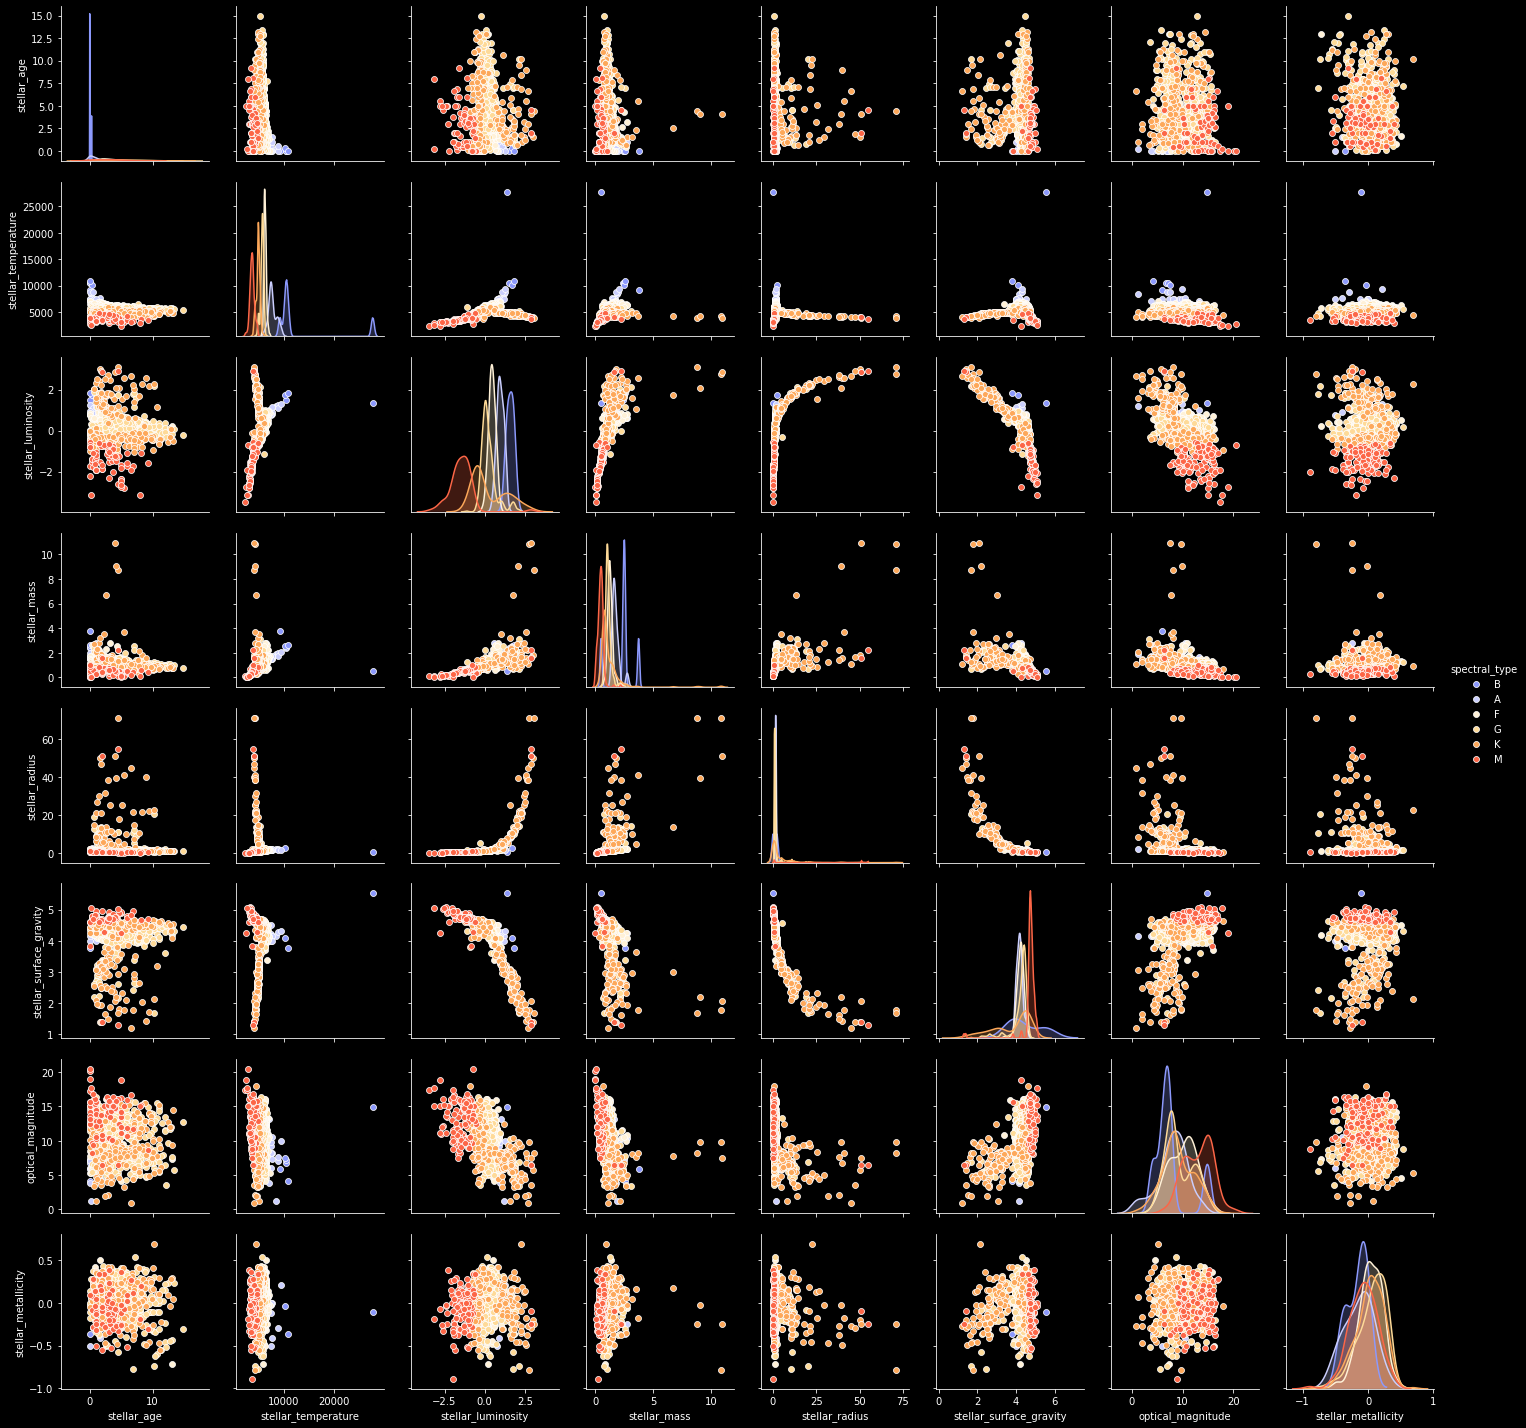

In [3]:
helpers.drawPairPlot(df2)

Die Abbildung zeigt als Übersicht, wie die Eigenschaften Spektraltyp (spectral_type), Alter (stellar_age), Temperatur (stellar_temperature), Lichtstärke (stellar_luminosity), Masse (stellar_mass), Radius (stellar_radius) und Oberflächenanziehungskraft (stellar_surface_gravity) jeweils zueinander stehen und indizieren, ob sie voneinander Abhängig sind. Die Farben stellen die verschiedenen Spektraltypen dar, wobei Differenzen zwischen den Spektraltypen ersichtlich sind. In der Diagonalen ist eine normalisierte Verteilung der Attribute ersichtlich. Abhängigkeiten, die mit Spektraltypen zu tun haben könnten untersuche ich weiter unten genauer. Für die folgende Analyse werden bestimmte Plots einzeln betrachtet. Die Attributpaare, bei denen ich keine Ahängigkeit vermute (also wenn der Scatterplot verstreut zu ist und keine klare Form oder Tendenz zeigt) werden nicht weiter erläutert. Den Plots wird Reihe und Spalte zugeordnet, mit dem Anfang oben links (Oberste Reihe, 1. Spalte --> stellar_age | stellar_age).

### Vermutungen Abhängigkeiten der Attribute
(1. Reihe) Alter:
- (1. Spalte) Spektraltyp: Ersichtlich ist, dass vor allem Sterne von den blauen Spektraltypen B und A sehr jung sind. Das liegt vor allem daran, dass Sterne in Anfangsstadien sich oft in diesem Spektrum befinden und danach Richtung rot abkühlen.

(2. Reihe) Temperatur:
- (2. Spalte) Spektraltyp: Der Plot zeigt, dass grundsätzlich je blauer ein Stern ist, desto höher ist dessen Temperatur.
- (3. Spalte) Lichtstärke: Eine geringe Tendenz zeigt, dass wenn die Lichtstärke steigt, auch die Temperatür höher ist.

(3. Reihe) Lichtstärke:
- (2. Spalte) Temperatur: Etwas deutlicher zeigt die Umkehrung der Achsen einen gewissen Zusammenhang zwischen Lichtstärke und Temperatur. Je höher die Temperatur, desto höher die Lichtstärke.
- (3. Spalte) Spektraltyp: Auch bei der Lichtstärke zeigt der Plot, dass tendenziell mit der Erhöhung der Lichtstärke der Spektraltyp blauer wird.
- (5. Spalte) Radius: Der Plot zeigt eine mit der Erhöhung des Radius eine Steigung, die einer logarithmischen Funktion ähnelt, also eine Anfangs extrem hohe Steigung, die nach und nach abnimmt.
- (6. Spalte) Oberflächenanziehungskraft: Mit der Erhöhung der Oberflächenanziehungskraft scheint die Lichtstärke zu sinken.
- (7. Spalte) Optische Magnitude: Auch eine tendzielle, aber eher undeutliche Abhängigkeit zeigt auch dieser Plot. Mit der Erhöhung der optischen Magnitude scheint die Lichtstärke zu sinken. Die optische Magnitude verhält sich in umgekehrter Proportion. Je kleiner die Magnitude, desto grösser erscheint der Stern am Himmel. Mit der Erhöhung der Lichtstärke steigt also auch die Grösse des Erscheinungsbildes.

(4. Reihe) Masse:
- (4. Spalte) Spektraltyp: Bei der Masse scheint grundsätzlich zu gelten, dass vor allem die rötlichen Spektraltypen den Grossteil der kleinmassigen Sterne bilden.
- (5. Spalte) Radius: Entgegen der Erwartung zeigt dieser Plot eine nur leichte Abhängigkeit mit dem Radius. Mit einer Steigung des Radius erhöht sich tendenziell die Masse. Hier hätte ich eine starke Abhängigkeit erwartet, weil wenn ein Stern grösser ist erscheint es nur logisch, dass auch seine Masse grösser ist, daher erstaunt mich dieses Ergebnis. Offenbar gibt es also starke Differenzen in der Dichte der Sterne.

(5. Reihe) Radius:
- (3. Spalte) Lichtstärke: Die Steigung des Radius mit der Erhöhung der Lichtstärke ähnelt einer exponentiellen Funktion. Da die Werte der Lichtstärke an sich logaritmisch sind, kann man zwischen Radius und Lichtstärke eine lineare Abhängigkeit vermuten. Je grösser also ein Stern, desto höher seine Lichtstärke.
- (4. Spalte) Masse: Auch dieser Plot zeigt eine geringe, aber vorhandene Abhängigkeit der Masse eines Sterns mit dem Radius. Genaueres wurde bereits bei Analyse der Masse erwähnt.
- (6. Spalte) Oberflächenanziehungskraft: Mit der Erhöhung der Oberflächenanziehungskraft sinkt der Radius. Die Senkung verhaltet sich ähnlich wie eine Umkehrfunktion einer logarithmischen Funktion.

(6. Reihe) OberflächenAnziehungskraft:
- (3. Spalte) Lichtstärke: Bei diesem Plot ist etwas besser ersichtlich, dass die Form der Senkung der einer negativen Exponentialfunktion ähnelt. Somit sinkt die Oberflächenanziehungskraft mit der Erhöhung der Lichtstärke.
- (5. Spalte) Radius: Die Oberflächenanziehungskraft sinkt grundsätzlich mit der Erhöhung der Lichtstärke mit einer Form, die der einer Umkehrfunktion einer logarithmischen Funktion ähnelt.

(7. Reihe) Optische Mangitude:
- (3. Spalte) Lichtstärke: Dieser Plot zeigt eine gewisse Tendenz, dass je höher die Lichtstärke desto kleiner wird die optische Magnitude. 
- (6. Spalte) Oberflächenanziehungskraft: Auch hier ist grob ersichtlich, dass mit der Erhöhung der Oberflächenanziehungskraft tendenziell die Optische Magnitude steigt.
- (7. Spalte) Spektraltyp: Der Plot zeigt, dass blaue Spektraltypen tendenziell eine kleinere Magnitude haben (also grösser am Nachthimmel sind) als rote Typen. Es gibt aber trotzdem viele überschneidungen.

(8. Reihe) Metallizität: Es ist kein Zusammenhang den anderen Attribute mit der Metallizität ersichtlich 

### Welche Attribute definieren den Spektraltypen eines Sterns und haben Einfluss darauf?
Anhand der vorherigen Analyse könnten also folgende Eigenschaften die Spektraltypen definieren:
- Alter
- Temperatur
- Lichtstärke
- Masse
- Optische Magnitude

### Die Spektraltypen im Vergleich: Temperatur

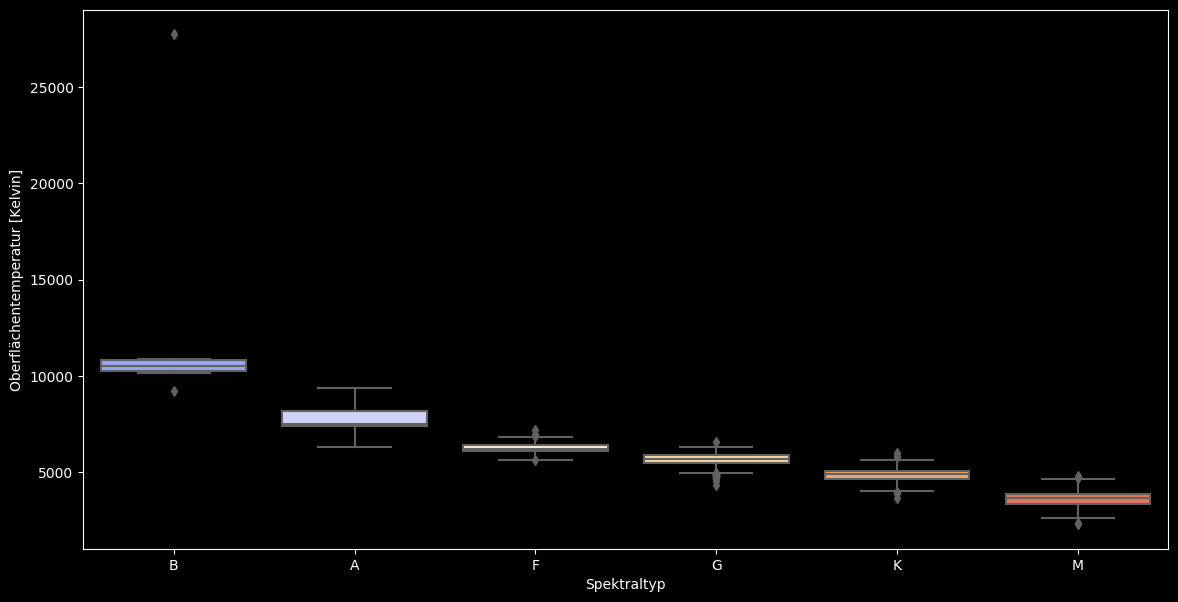

In [4]:
helpers.drawBoxplot(df2, 'stellar_temperature', 'Oberflächentemperatur', '[Kelvin]')

Der Plot zeigt die Verteilung der Temperatur pro Spektraltyp. Mit der Senkung der Intensität der bläue und der Steigung der röte des Lichtspektrums nimmt die Temperatur ab. Je blauer ein Stern, desto heisser. Die Temperatur ist also ein ausschlaggebender Faktor bei der Klassifizierung der Spektraltypen. Es gibt in Ausnahmefällen jedoch Überschneidungen.

### Die Spektraltypen im Vergleich: Lichtstärke

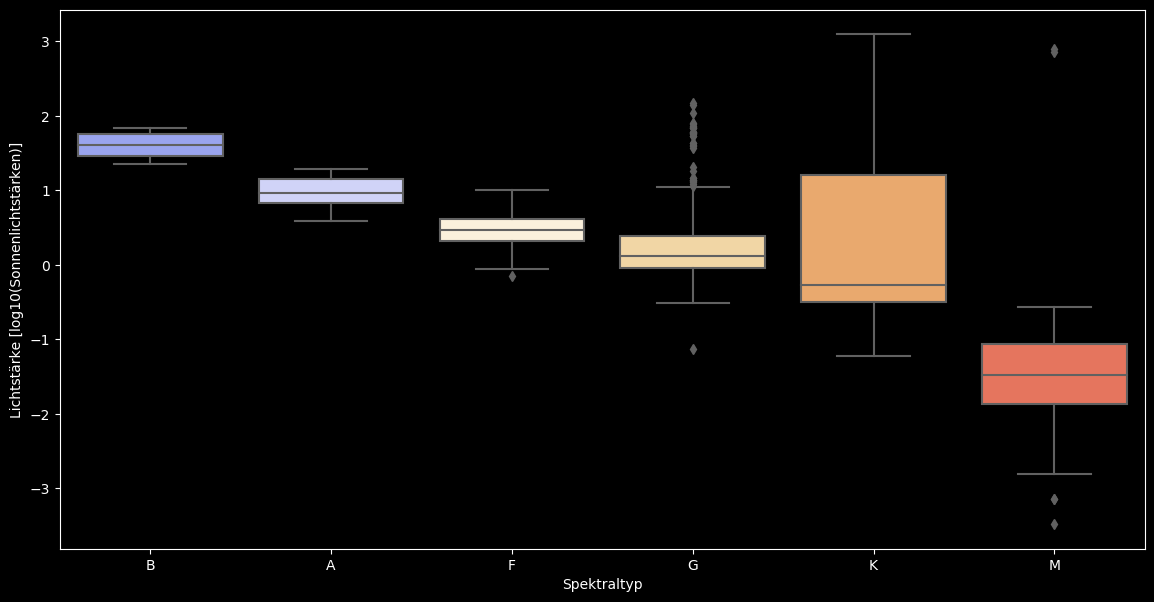

In [5]:
helpers.drawBoxplot(df2, 'stellar_luminosity', 'Lichtstärke', '[log10(Sonnenlichtstärken)]')

Der Plot zeigt die Verteilung der Lichtstärke pro Spektraltyp. Mit der Senkung der Intensität der bläue und der Steigung der röte des Lichtspektrums nimmt die Lichtstärke generell ab. Je blauer ein Stern, desto intensiver die Lichtstärke. Auch die Lichtstärke scheint anhand des linearen Abstiegs mit den Spektraltypen ein ausschlaggebender Faktor zu sein. Es gibt jedoch vor allem beim Spektraltyp K viele Überschneidungen mit den heisseren Spektraltypen. Auch erstaunlich ist, dass ganz wenige Exoten bei M-Typ Sternen gibt, die eine extrem hohe Lichtstärke haben.

Weitere Attribute, die Abhängigkeiten von Spektraltypen zeigen sind im Appendix unter dem Kapitel "Ergänzende Analysen zur Datastory" beschrieben.

### Einflüsse der Spektraltypen auf planetare Eigenschaften: Anzahl Planeten im System

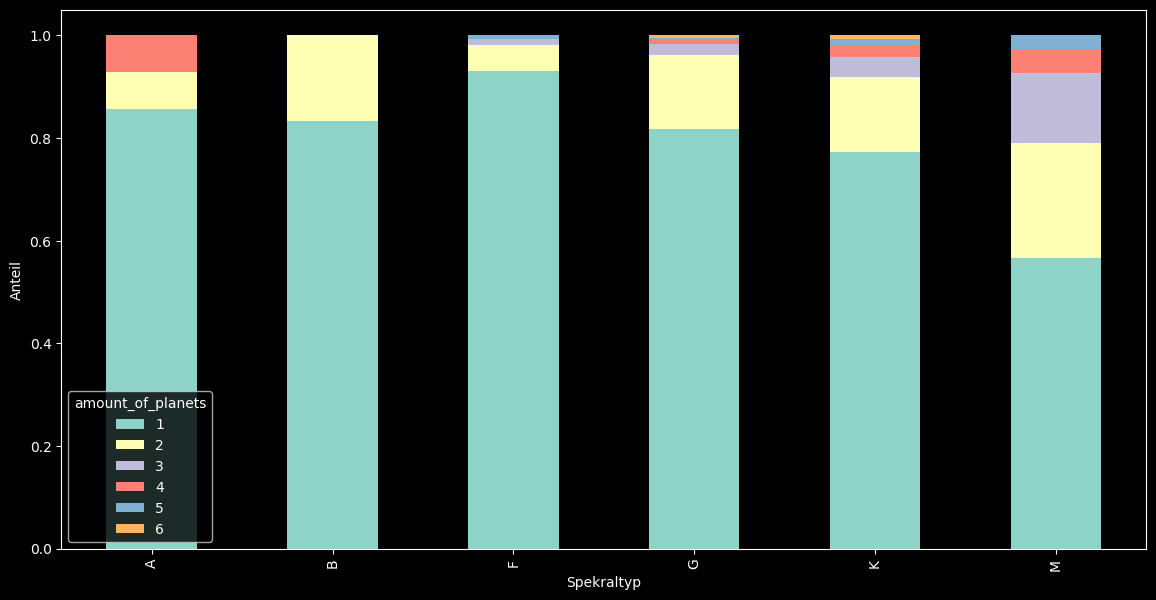

In [6]:
helpers.drawStackedBarPlot(df2, "spectral_type", "amount_of_planets")

Der Plot zeigt, wie die Grössenordnungen der Planetensysteme auf die jeweiligen Spektraltypen verteilt sind. Es ist ersichtlich, dass Typ A-Sterne einen Grossteil der Systeme mit 4 Planeten beherbergen. Spektraltyp B hat nur Systeme mit 1 oder 2 Planeten. Die meisten Systeme der Grösse 5 sind bei M-Sternen und diejenigen mit 6 Planeten sind bei G oder M-Sternen vorzufinden.

### Einflüsse der Spektraltypen auf planetare Eigenschaften: Planetenmasse

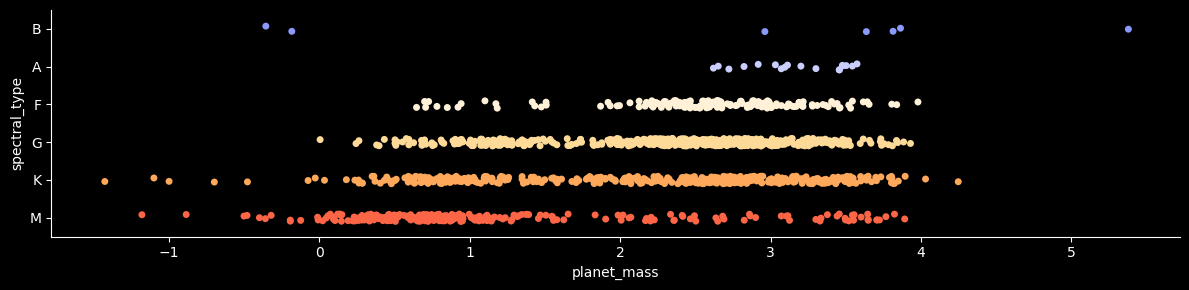

In [7]:
helpers.drawCatplot(df, "planet_mass")

Der Plot zeigt die Verteilung der Masse der Planeten pro Spektraltyp. Es gibt eine Tendenz, dass heisse blaue Spektraltypen massigere Planeten haben, jedoch gibt es 2 Exoten beim Typ B, die sehr klein sind. Auch ersichtlich ist, dass vor allem Planeten, die einen M-Stern als Host haben generell klein sind. Die Masse der Planeten steigt also tendenziell mit den Spektraltypen.

Weitere Attribute, die Abhängigkeiten von Spektraltypen zeigen sind im Appendix unter dem Kapitel "Ergänzende Analysen zur Datastory" beschrieben.

## Conclusion

Die Analysen der Spektraltypen stimmen grösstenteils mit der Definition von https://www.enchantedlearning.com/subjects/astronomy/stars/startypes.shtml überein. Was ich nicht bestätigen konnte war der Zusammenhang des Spektraltyps mit dem Radius des Sternes. Das die Spektraltypen hautpsächlich von Eigenschaften definiert werden, die mit Licht und Temperatur zu tun haben war zu erwarten, denn Sterne werden mittels einer Analyse ihres Lichtspektrums in diese Spektraltypen klassifiziert.
Grundsätzlich lässt sich mit meiner Analyse nur Tendenzen zeigen, da schlussendlich nur etwas über 1000 Einträge mit Spektraltypen im Exoplanetenarchiv vorhanden sind. Für eine genauere aufschlussreichere Aussage müssten mehr Datenpunkte zur Verfügung stehen.